In [27]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

In [3]:
matriz_transicion=np.array([[0.8, 0.2],[0.2,0.8]])
matriz_emision=np.array([[0.5, 0.9],[0.5,0.1]])


A)

In [4]:
probabilidad_priori=np.array([0.2, 0.8])
probabilidad_priori_justa=probabilidad_priori[0]
probabilidad_priori_sesgada=probabilidad_priori[1]

B)

In [18]:
def generar_secuencias_ocultas(estados, longitud):
    if longitud == 1:
        return [[estado] for estado in estados]
    
    secuencias = []
    for secuencia_anterior in generar_secuencias_ocultas(estados, longitud - 1):
        for estado in estados:
            nueva_secuencia = secuencia_anterior + [estado]
            secuencias.append(nueva_secuencia)
    return secuencias

def calcular_probabilidad(pi, T, secuencia_oculta):
    probabilidad = pi[estados_ocultos.index(secuencia_oculta[0])]
    for t in range(1, len(secuencia_oculta)):
        probabilidad *= T[estados_ocultos.index(secuencia_oculta[t - 1])][estados_ocultos.index(secuencia_oculta[t])]
    return probabilidad

estados_ocultos = ['J', 'B']

longitud_secuencia = 8
posibles_secuencias_ocultas = generar_secuencias_ocultas(estados_ocultos, longitud_secuencia)

probabilidad_maxima = 0.0
secuencia_maxima = None

for secuencia_oculta in posibles_secuencias_ocultas:
    probabilidad = calcular_probabilidad(probabilidad_priori, matriz_transicion, secuencia_oculta)
    
    if probabilidad > probabilidad_maxima:
        probabilidad_maxima = probabilidad
        secuencia_maxima = secuencia_oculta

print("Secuencia oculta más probable:", secuencia_maxima)
print("Probabilidad asociada:", probabilidad_maxima)
print("En este código, B representa la moneda sesgada (biased)")

Secuencia oculta más probable: ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
Probabilidad asociada: 0.1677721600000001
En este código, B representa la moneda sesgada (biased)


In [6]:
# Definimos estados y priors
States = np.array([0,1]) # Deben ser enteros 
Prior =  np.array([0.2,0.8])

In [7]:
# Definimos matrices de emisión y transmision
T = np.array([[0.8, 0.2],[0.2,0.8]])

E = np.array([[0.5, 0.9],[0.5,0.1]])


#np.sum(T,axis=0)

In [8]:
DictH = {0:'Justa',1:'Sesgada'} 


In [9]:
DictO = {0:'Cara',1:'Sello'}


In [10]:

Obs = np.array([1, 0, 0, 0, 1, 0, 1, 0])

In [11]:
def GetStates(States,N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    print(CStates)
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
       # print(p)
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
                
    return np.array(Permu)
HiddenStates = GetStates(States,8)
HiddenStates

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [12]:
def GetProb(T,E,Obs,State,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[State[0]]
    
    # Matriz de transicion
    for i in range(n-1):
        p *= T[ State[i+1], State[i]  ]
        
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
        
    return p

In [13]:
P = np.zeros(HiddenStates.shape[0], dtype=np.float64)

In [14]:
for i in range(P.shape[0]):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)
    
print(P)

[1.63840000e-04 7.37280000e-05 2.04800000e-06 1.84320000e-05
 2.04800000e-06 1.84320000e-05 1.84320000e-05 1.84320000e-05
 3.27680000e-05 1.47456000e-05 8.29440000e-06 3.68640000e-06
 9.21600000e-07 2.56000000e-08 3.68640000e-06 8.29440000e-06
 2.30400000e-07 2.07360000e-06 3.68640000e-06 8.29440000e-06
 2.30400000e-07 2.07360000e-06 2.30400000e-07 3.31776000e-05
 8.29440000e-06 2.30400000e-07 2.07360000e-06 2.30400000e-07
 2.07360000e-06 3.31776000e-05 1.47456000e-05 4.09600000e-07
 3.68640000e-06 4.09600000e-07 3.68640000e-06 3.68640000e-06
 5.89824000e-05 2.65420800e-05 1.84320000e-07 1.65888000e-06
 7.37280000e-07 1.65888000e-06 9.33120000e-07 4.14720000e-07
 1.65888000e-06 4.60800000e-08 6.63552000e-06 1.65888000e-06
 9.33120000e-07 4.14720000e-07 1.03680000e-07 2.88000000e-09
 4.14720000e-07 1.49299200e-05 4.14720000e-07 3.73248000e-06
 6.63552000e-06 1.65888000e-06 9.33120000e-07 4.14720000e-07
 1.03680000e-07 2.88000000e-09 4.14720000e-07 9.33120000e-07
 2.59200000e-08 2.332800

C)

In [35]:
ii = np.where( P == np.amax(P))
print(HiddenStates[ii])
lista=np.array([])
for i in HiddenStates[ii]:
    for j in i:
        if j == 0:
            lista=np.append(lista, "Justa")
        if j==1:
            lista=np.append(lista, "Sesgada")
          
print(lista) 
print(max(P))

[[1 1 1 1 0 0 0 0]]
['Sesgada' 'Sesgada' 'Sesgada' 'Sesgada' 'Justa' 'Justa' 'Justa' 'Justa']
0.0001911029760000001


In [36]:
np.sum(P)

0.0019344381513984013

In [37]:
ObsStates = GetStates([0,1],8)

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


In [38]:
Nobs = ObsStates.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):
    
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)
        
    PObs[j] = np.sum(P)



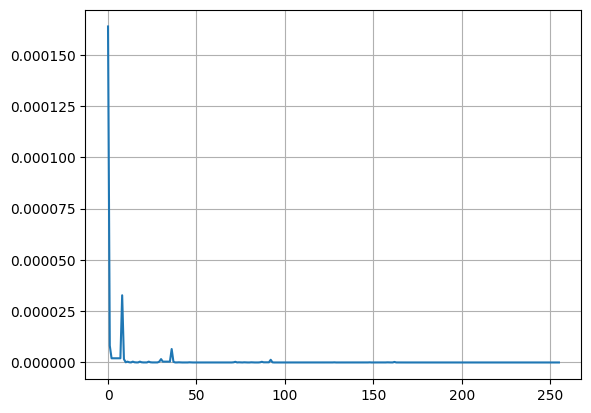

In [39]:
plt.plot(P)
plt.grid(True)

D)

In [40]:
print(np.sum(PObs))
print("El resultado se acerca de sobremanera al resultado teórico de 1")

1.0000000000000007
El resultado se acerca de sobremanera al resultado teórico de 1


E) ¿Depende el resultado de la probabilidad a-priori?

la probabilidad a-priori afecta de manera directa al resultado, ya que la probabilidad a priori claramente favorece a la moneda sesgada, ya que para la moneda justa la probabilidad a-priori es 0.2 y para la moneda sesgada la probabilidad a-priori es 0.8.
De esta manera, 0.8 es mucho mayor que 0.2, con lo cual la la probabilidad a-priori sí influye sobre el resultado, en este caso, favoreciendo a la moneda sesgada.